## Analyzing the learning and performance of a model

In [3]:
from data_preparation import downloadData, loadData

train, test = downloadData(download=False)
train_l, test_l = loadData(train, test)
classes_names=train_l.dataset.classes
print(classes_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
train_iter=iter(train_l)
test_iter=iter(test_l)

#### Looking at some images

In [8]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

def show_image(batch):
    images, labels = batch
    images=torchvision.utils.make_grid(images[:4])
    images=images/2+0.5
    npimages=images.numpy()
    
    plt.figure(figsize=(7,5))
    plt.imshow(np.transpose(npimages,(1,2,0)))
    plt.show()
    print(' '.join('%5s' % classes_names[labels[j]] for j in range(4)))

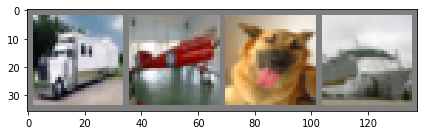

truck airplane   dog  ship


In [6]:
show_image(train_iter.next())


### Predicted classes for images


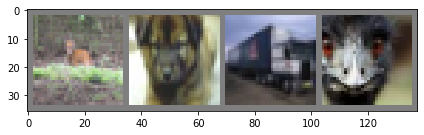

 deer   dog truck  bird
And now predicted:
 deer   cat truck  frog


In [11]:
import model
import torch
test_batch=test_iter.next()
show_image(test_batch)
inputs, labels = test_batch

my_model=model.load_model("./SavedModel")

predictions=my_model(inputs)
_, argmax_predictions = torch.max(predictions.data, 1)

print("And now predicted:")
print(' '.join('%5s' % classes_names[argmax_predictions[j]] for j in range(4)))



